# Data clean up system 
Given the input folder 'raw_data', return the folder 'sample_data' containing csv file obtained from cleaning 
the raw data in the 'raw_data' folder

In [65]:
import pandas as pd
import os
from itertools import chain
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
os.makedirs("bla")

In [73]:
def get_user_cleaned_data(input_folder, user_data_file):
    users = pd.read_json(f"{input_folder}/{user_data_file}", orient="split")
    # remove NaN, None and other weird row
    if users.dropna().sum().sum() != 0:
        users.dropna(inplace=True)
    return users


def get_ranking_cleaned_data(input_folder, ranking_data_file):
    ranking = pd.read_csv(f"{input_folder}/{ranking_data_file}", sep="::",names=["BrukerID","FilmID","Rangering","Tidstempel"])
    # remove NaN, None and other weird row
    if ranking.dropna().sum().sum() != 0:
        ranking.dropna(inplace=True)
    return ranking


def get_raw_film_data(input_folder, film_data_file):
    df = pd.read_excel(f"{input_folder}/{film_data_file}", sheet_name='film', index_col=0)
    df.Sjanger = df.Sjanger.apply(lambda s: s.split('|'))
    df = df.sort_values(by=['FilmID'], ignore_index=True)
    df_id_title = df[['FilmID', 'Tittel']]
    
    all_genres = list(df.Sjanger)
    unique_genres  = sorted(list(set(list(chain(*all_genres)))))
    unique_genres_d = dict(map(lambda s: (s,[0 for _ in range(len(df))]),unique_genres))
    df_genre = pd.DataFrame(unique_genres_d) 
    df_genre.insert(loc=0, column="FilmID", value=list(df_id_title.FilmID))
    film_id_genre_map = dict( zip( list(df.FilmID), list(df.Sjanger) ))
    
    for column_name in unique_genres:
        df_genre[column_name] = [1 if column_name in film_id_genre_map[ID] else 0 for ID in film_id_genre_map.keys()]
    df_genre.drop(["FilmID","Ukjennt", "Children's"], axis=1, inplace=True)
    df_film = pd.concat([df_id_title, df_genre], axis=1)
    if df_film.dropna().sum().sum() != 0:
        df_film.dropna(inplace=True)
    return df_film


def save_to_csv(input_folder, output_folder):
    config = {
        "film.xlsx": {"function": get_raw_film_data},
        "bruker.json": {"function": get_user_cleaned_data},
        "rangering.dat": {"function":get_ranking_cleaned_data},
    }
    for file_name in config:
        func = config[file_name]["function"]
        df = func(input_folder, file_name)
        df.dropna(inplace=True)
        new_name = file_name.split('.')[0]
        print(f"saving {new_name}.csv")
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)
        df.to_csv(f"{output_folder}/{new_name}.csv")

In [74]:
save_to_csv("raw_data", "sample_data1")

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [10]:
df_film = get_raw_film_data("raw_data/film.xlsx")
df_film

,FilmID,Tittel,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,Autumn in New York (2000),0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,1,"Vie est belle, La (Life is Rosey) (1987)",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,Defying Gravity (1997),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,3,Ruthless People (1986),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,Portraits Chinois (1996),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Cat People (1982),0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3879,3949,"Saltmen of Tibet, The (1997)",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3880,3950,Bride of Re-Animator (1990),0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3881,3951,True Lies (1994),1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [13]:
df_film.isnull().sum()

FilmID         0
Tittel         0
Action         0
Adventure      0
Animation      0
Children       0
Comedy         0
Crime          0
Documentary    0
Drama          0
Fantasy        0
Film-Noir      0
Horror         0
Musical        0
Mystery        0
Romance        0
Sci-Fi         0
Thriller       0
War            0
Western        0
dtype: int64

In [48]:
users = get_user_cleaned_data("raw_data/bruker.json")
users

,BrukerID,Kjonn,Alder,Jobb,Postkode
0,0,None,45.0,6.0,92103
1,1,M,50.0,16.0,55405-2546
2,2,M,18.0,20.0,44089
3,3,M,NaN,1.0,33304
4,4,M,35.0,6.0,48105
...,...,...,...,...,...
6035,6036,M,45.0,0.0,61821
6036,6037,F,NaN,NaN,None
6037,6038,None,25.0,16.0,33301
6038,6039,M,35.0,14.0,92075


In [71]:
 users.isnull().sum().sum()

2341

In [36]:
def plot_missing_values(df, name):
    mis_values = pd.DataFrame(df.isnull().sum()).apply(lambda x: x/len(df))
    plt.bar(mis_values.index, mis_values[0])
    plt.ylabel('%')
    plt.title(f'Percentage of missing value for {name}')
    plt.show()

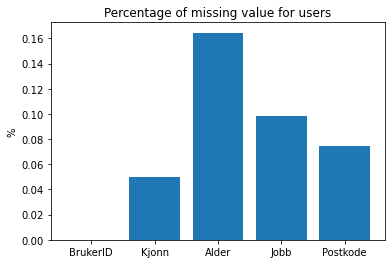

In [38]:
plot_missing_values(users, 'users')

In [43]:
ranking = get_ranking_cleaned_data('raw_data/rangering.dat')

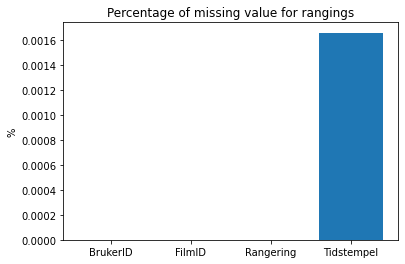

In [44]:
plot_missing_values(ranking, 'rangings')

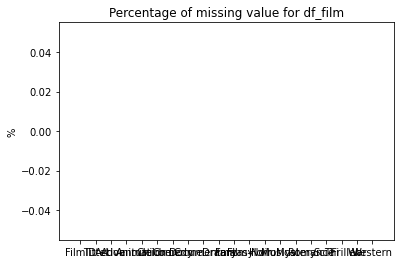

In [45]:
df_film
plot_missing_values(df_film, 'df_film')

In [54]:
cleaned_users = users.dropna()

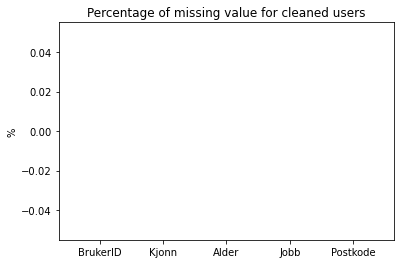

In [55]:
plot_missing_values(cleaned_users, 'cleaned users')